In [77]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [78]:
a = 19.0 * 10**(-6)
L = 1.5
T = 4.5 * 3600
alpha = 15
beta = 34

h_T = 5
N_T = int(T / h_T)

N_L = 100
h_L = L / N_L


In [79]:
def heat_equation_analytical(t, y, alpha, beta, L, a):
  res = (beta - alpha) / L * y + alpha
  
  sum = 0;
  for n in range(1, 31):
    e_pow = np.e ** ((-a) * t * ((np.pi * n / L) ** 2))
    sum += 1 / n * ( beta * ((-1) ** n) - alpha ) * e_pow * np.sin(np.pi * n / L * y)
  sum *= 2 / np.pi
  
  res += sum
  return res

(100,)
(3240,)
(3240, 100)


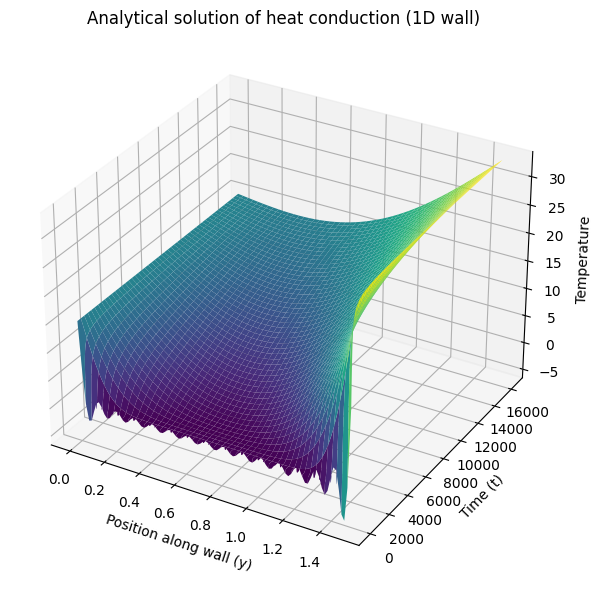

In [80]:
y_vals = np.linspace(0, L, N_L)
t_vals = np.linspace(0, T, N_T)

print(y_vals.shape)
print(t_vals.shape)

# Create surface data
Z = np.zeros((N_T, N_L))  # rows = time, cols = position

print(Z.shape)

for i in range (0, N_T):
	for j in range(0, N_L):
		Z[i, j] = heat_equation_analytical(i * h_T, j * h_L, alpha, beta, L, a)


# Create meshgrid
Y, X = np.meshgrid(t_vals, y_vals, indexing='ij')  # careful with axes

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Position along wall (y)')
ax.set_ylabel('Time (t)')
ax.set_zlabel('Temperature')
ax.set_title('Analytical solution of heat conduction (1D wall)')

plt.tight_layout()
plt.show()
